In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [14]:
data = pd.read_csv('auto-mpg.csv')

In [15]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [24]:
data = data[data["horsepower"] != '?']
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [25]:
data["horsepower"] = data['horsepower'].astype(float)

In [26]:
z = np.abs(stats.zscore(data.horsepower))

In [27]:
z.shape

(392,)

In [32]:
z.head()

0    0.664133
1    1.574594
2    1.184397
3    1.184397
4    0.924265
Name: horsepower, dtype: float64

In [28]:
threshold = 3
print(np.where(z > 3))

(array([  6,   8,  13,  94, 115], dtype=int64),)


In [34]:
z1 = np.abs(stats.zscore(data.acceleration))
np.where(z1>3)

(array([297, 388], dtype=int64),)

In [38]:
data = data.acceleration

AttributeError: 'Series' object has no attribute 'acceleration'

In [39]:
q1 = np.percentile(data, 25)
q2 = np.percentile(data, 50)  # Median
q3 = np.percentile(data, 75)
iqr = q3 - q1  # Interquartile range
lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr

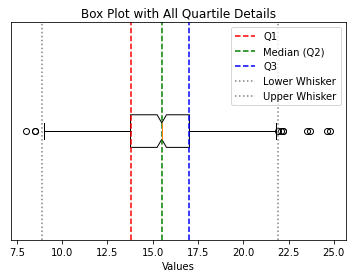

In [40]:
# Create the box plot
plt.boxplot(data, notch=True, vert=False)
plt.xlabel('Values')
plt.title('Box Plot with All Quartile Details')
plt.xticks(fontsize=10)
plt.yticks([])
plt.axvline(q1, color='red', linestyle='--', label='Q1')
plt.axvline(q2, color='green', linestyle='--', label='Median (Q2)')
plt.axvline(q3, color='blue', linestyle='--', label='Q3')
plt.axvline(lower_whisker, color='gray', linestyle=':', label='Lower Whisker')
plt.axvline(upper_whisker, color='gray', linestyle=':', label='Upper Whisker')
plt.legend()
plt.show()